In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

# Set start and end datas for data download
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2016, 1, 1)

# Import Data
unemp = web.DataReader('LRUN64TTUSA156N', 'fred', start, end)
inf = web.DataReader('FPCPITOTLZGUSA', 'fred', start, end)

/Users/joaobduarte/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
data = pd.DataFrame()
data['unemp'] = unemp.LRUN64TTUSA156N
data['inf'] = inf.FPCPITOTLZGUSA
data.head()

,unemp,inf
DATE,,
1960-01-01,5.617115,1.457976
1961-01-01,6.770271,1.070724
1962-01-01,5.596210,1.198773
1963-01-01,5.739126,1.239669
1964-01-01,5.246175,1.278912


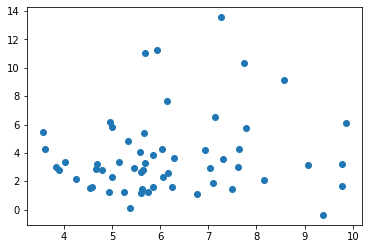

In [4]:
# Scatter plot
plt.scatter(data['unemp'], data['inf'])
plt.show()

In [5]:
# Fit regression 
X = data['unemp']
X = sm.add_constant(X)

y = data['inf']

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    inf   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.7841
Date:                Fri, 26 Jun 2020   Prob (F-statistic):              0.380
Time:                        15:08:55   Log-Likelihood:                -139.18
No. Observations:                  57   AIC:                             282.4
Df Residuals:                      55   BIC:                             286.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5060      1.514      1.655      0.1

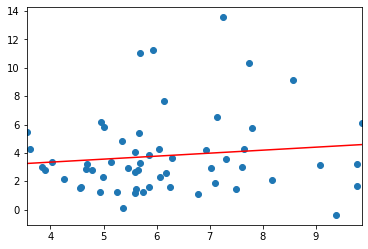

In [10]:
# Scatter plot
sm.graphics.abline_plot(model_results=results, color = 'r') # creates a new figure with model fit
plt.scatter(data['unemp'], data['inf']) # adds scatter plot to figure
#plt.plot(data['unemp'], results.fittedvalues, color="r") # alternative
plt.show()